# Lab 3: Variance, Correlation, and Covariance in the UBC Weather Station Data

## *Lab Overview*

In this lab you will use linear regression, correlations and multi-linear regression to ask the following three questions for the UBC weather station/global temperature time series:

- Is there a trend in the temperature time series?
- Are temperature time series correlated with external or internal factors (e.g. atmospheric CO2, El Nino oscillation)?
- Are your results compatible or not with the IPCC reports, or can they prove or contradict that there is a global warming trend and that it is caused by anthropogenic CO2 emissions?

## *Learning Goals*

After this lab you should be able to:

- Perform linear regression and multilinear regression,  calculate correlation coefficients, and use histograms in Matlab
- Use these tools to quantify the importance of different factors in explaining the variability of a time serie
- Think critically about your plots/results, and assess whether they allow you to make conclusions on a hypothesis or not.

## *To hand in*
1.	A figure containing the raw time series of the 7 variables that will be used in this lab, in separate subplots, with linear regression for temperature time series (part 1)
2.	One figure containing histograms of temperature before/after 1985 for local (UBC) and global temperatures (part 1)
3.	One figure containing a scatterplot of the UBC temperature against the global mean temperature (part 3)
4.	One figure containing the scatterplots of UBC temperature against MEI index and global temperature against MEI index, and associated linear regressions (part 4)
5.	One figure containing the scatterplots of global mean temperature anomaly against temperature predicted by a multilinear regression (using 5 explanatory variables, part 5)
6.	Two figures containing, respectively, global temperature anomaly as a function of Donald Trump’s age, and made-up global temperature against CO2 time series (part 6)
7.	The Lab 3 Worksheet
 
## 1.	Load the data and plot each time series
Start by loading the data needed for this lab. They are all contained in the file ‘lab3_data.xlsx’ available on connect. You can open it with the pandas <code>.read_xlsx()</code> function which we used in previous labs. Don't forget to import the library.

In [1]:
#all the libraries we will use today
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats

#loading data
lab3_data = pd.read_excel(r"lab3_data.xlsx",index_col=0)
#dropping any NA data
lab3_data = lab3_data.dropna()

 The spreadsheet contains the following 8 variables:
- **The date**, which is the same for all of the time series and has been formatted nicely as a number corresponding to the year+month/12. For example, June 2000 would be “2000.46”. Thus, **you will not need to bother with converting dates from text to datetime** for this lab! All time series in this lab have the same starting/end date and are monthly values, so **you only have one array of date to deal with!**
- **Two temperature anomalies time series**. The first one is measured at UBC weather station; you computed the anomaly last lab. The second one is the global mean temperature collected by the Climate Research Unit. Both time series are anomalies relative to the 1961-1990 seasonal cycle and are expressed in Celsius. The UBC time series contains NaNs at the beginning because measurements only began in ~1960
- **The total solar irradiance (TSI) time series**, i.e., the flux of solar energy entering through the top of the atmosphere in W/m2. The datasets from the SATIRE project (monthly mean) and from Lean et al (2000) (yearly mean) have been combined to obtain monthly TSI over 1950-2016.
- **The global mean stratospheric aerosol optical depth (AOD)** time series (dimensionless) obtained from the Goddard Institute for Space Study, which mostly reflects long-lived aerosols from volcanic eruptions. A constant value was assumed for the period 2012-2016 for which no data was available.
- **The atmospheric CO2 concentration and anthropogenic SO2 emissions**: yearly time series were obtained from the Earth Policy Institute and the Pacific Northwest National Laboratory, respectively, and interpolated to obtain monthly time series. Their units are ppm and Tg/year (Teragrams/year, i.e. 10^9 kilograms/year) respectively
- **The Multivariate ENSO Index (MEI)** which we used in lab 1 and was reviewed during the prelab. The MEI is dimensionless and positive during an El Nino (negative during La Nina) event.

We are going to plot each time series in separate subplot but on the same figure using the input parameter subplots = True (seen in several lab already). As we will need some more functionality around the design and placment of our subplots, we will introduce some new plotting functionality as we go.

First lets start of by creating a list of all the column headers from our DataFrame, this will be useful when we want to give titles to our subplots.

In [2]:
titles = lab3_data.columns.values.tolist()

Now, we are going to create a new pyplot figure object. This is going to allow us to create reference variables to each subplot, as well as some functionality around our figure design. For example, as we anticipate to have seven plots on our figure, we may want to make sure te figure size is big enough to fit all of them:

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

<Figure size 1800x1800 with 0 Axes>

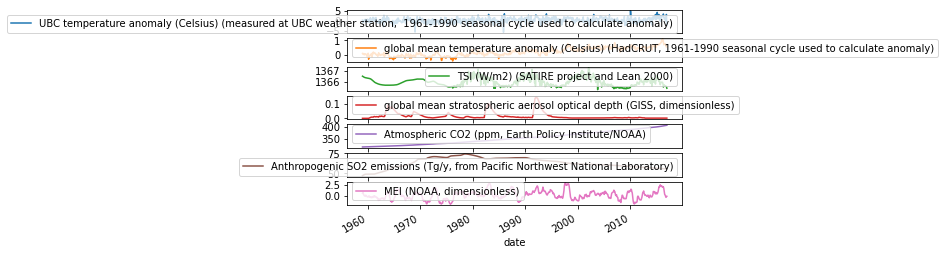

In [3]:
#making sure our new figure is a good size,
#feel free to play with the input numbers
#and see how the figure changes
fig1 = plt.figure(figsize=[25,25])

# you may notice that our figure is unreadable regardless of the figure size we choose.
# well fix this in the next few cells.
lab3_data.plot(subplots=True)

If you'd like to see what other stuff we can use as inputs for the <code>.figure()</code> function, head over to the documentation: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure

Now that we have a figure object set up, we can add subplots. we can do so by using the <code>.add_subplot()</code> function. Calling this function on our figure will return a subfigure object, which we can later use to refer to specific subplots. You will also notice that we need to add a three number input to the <code>.add_subplot()</code> function of the form XYZ. The X will represent the amount of rows we want on the figure, the Y represents the amount of Columns we want on the figure and the Z will let the function know which figure we want our returned object to refer too. I know this sounds complicated but maybe seeing an example will help you out:

In [4]:
ax11 = fig1.add_subplot(421) #ax11 will refer to the plot on the top left of the figure
ax12 = fig1.add_subplot(422) #ax12 will refer to the plot underneat ax11
ax13 = fig1.add_subplot(423) #ax13 will refer to the plot underneat ax12
ax14 = fig1.add_subplot(424) #ax14 will refer to the plot underneat ax13
ax15 = fig1.add_subplot(425) #ax15 will refer to the plot on the top right of our figure
ax16 = fig1.add_subplot(426) #ax16 will refer to the plot underneat ax15
ax17 = fig1.add_subplot(427) #ax17 will refer to the plot underneat ax16

#making an array of axis for easier work later on:
ax1 = [ax11,ax12,ax13,ax14,ax15,ax16,ax17]

We're almost done! All thats left to do is replot our DataFrame, we will use two new inputs:
- <code>title = titles</code>. Remember the list from before? well now that Python knows we have sevene subplots, if we pass in a list of seven Strings as a parameter, it will automatically match each title to a subplot in chronilogical order
- <code>ax=[ax11,ax12,ax13,ax14,ax15,ax16,ax17]</code> We actually have to tell Python which subplot is which. Again, Python will automatically match each subfigure object to a corresponding subplot inchronilogical order

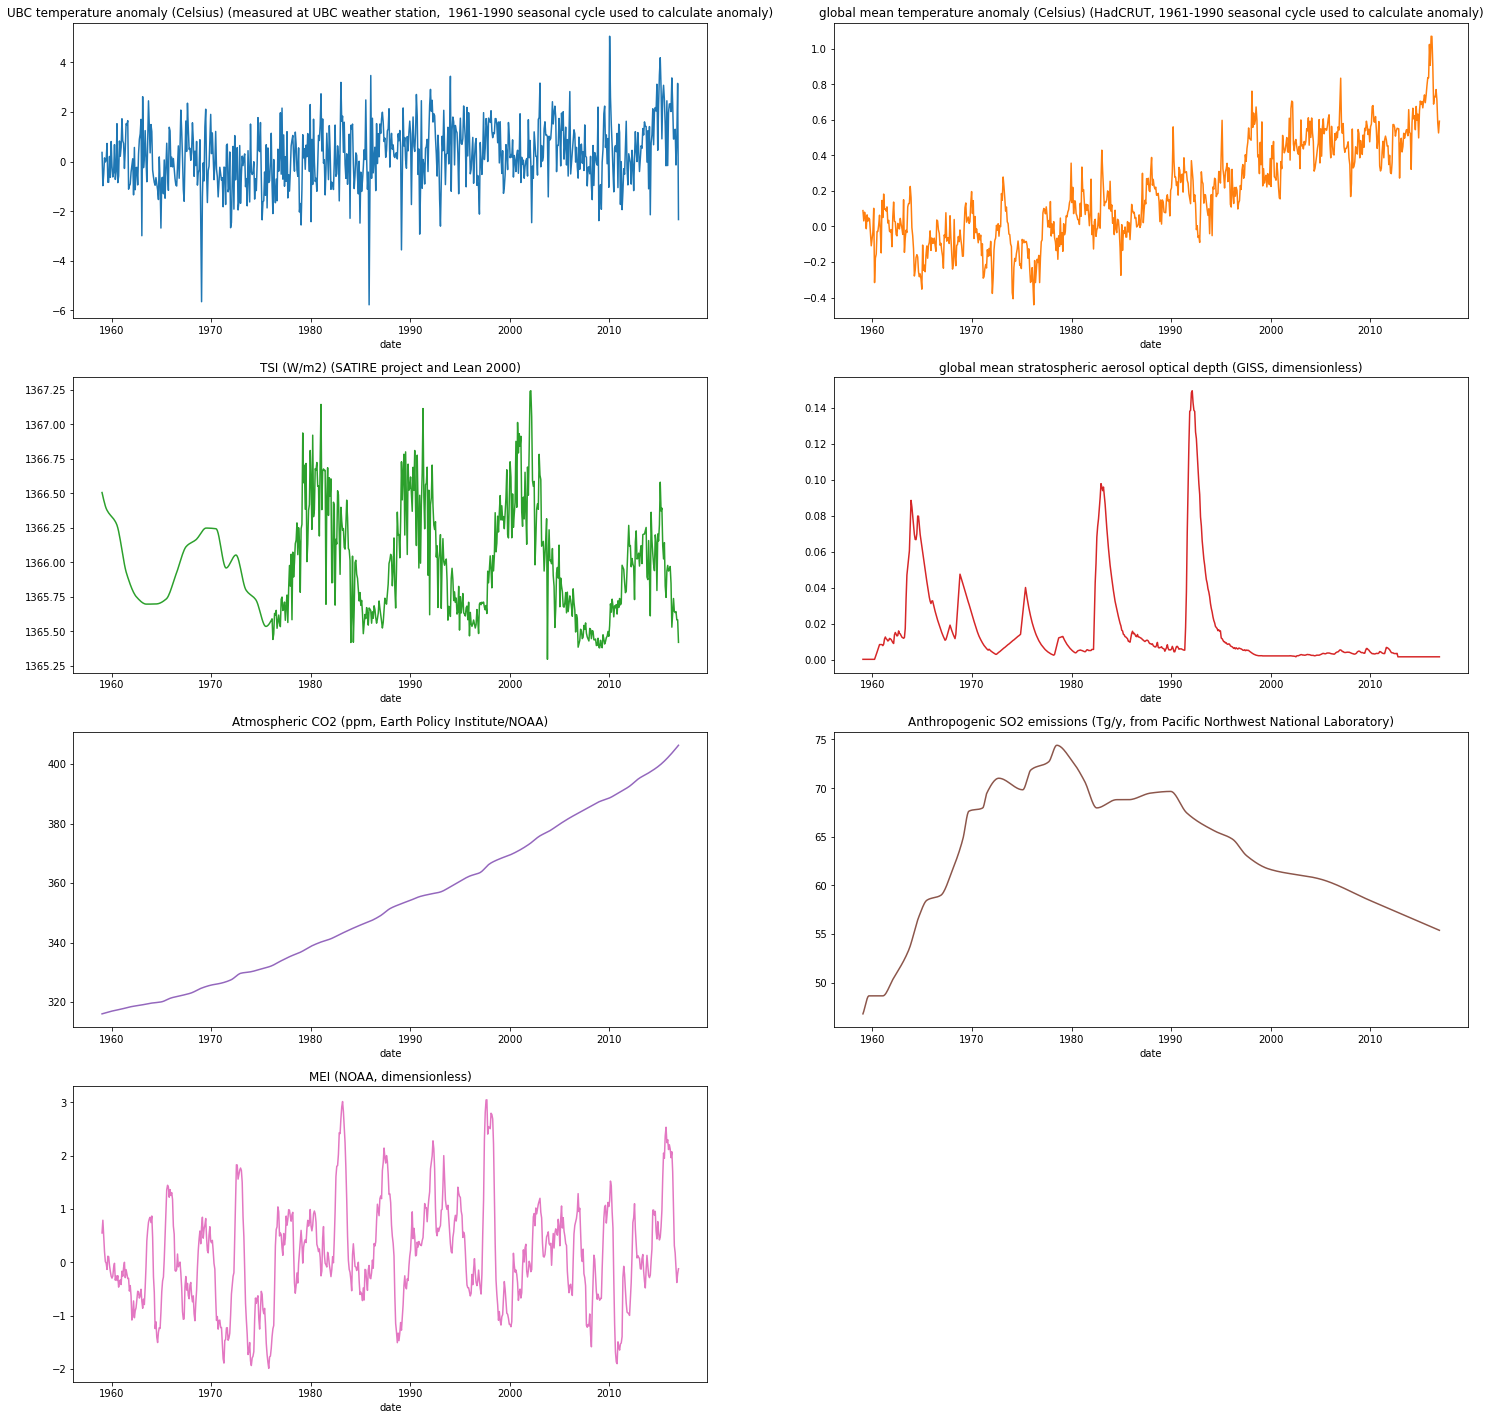

In [5]:
lab3_data.plot(subplots=True,legend=False,title=titles,ax=[ax11,ax12,ax13,ax14,ax15,ax16,ax17])

#due to the nature of Jupyter NoteBooks, we will have to write the name of the figure every time we replot
#if you are using an IDE, don't worry about writing this everytime
fig1

In addition and as a warm-up, perform a linear regression of each temperature time series against time as done in the lab:
- Display the corresponding regression line on each graph. The regression line is the temperature predicted by your regression as a function of your independent variable (i.e. the date in this case)
- The slope of each regression will give you the temperature trend.
- Display the values of the trend (don’t forget units!) and the coefficient of determination on each temperature time series plot either in the legend (use the function legend() ) or using the function text().

Well help you out with the ubc data as there might be some things we should go over, the global data is all yours...

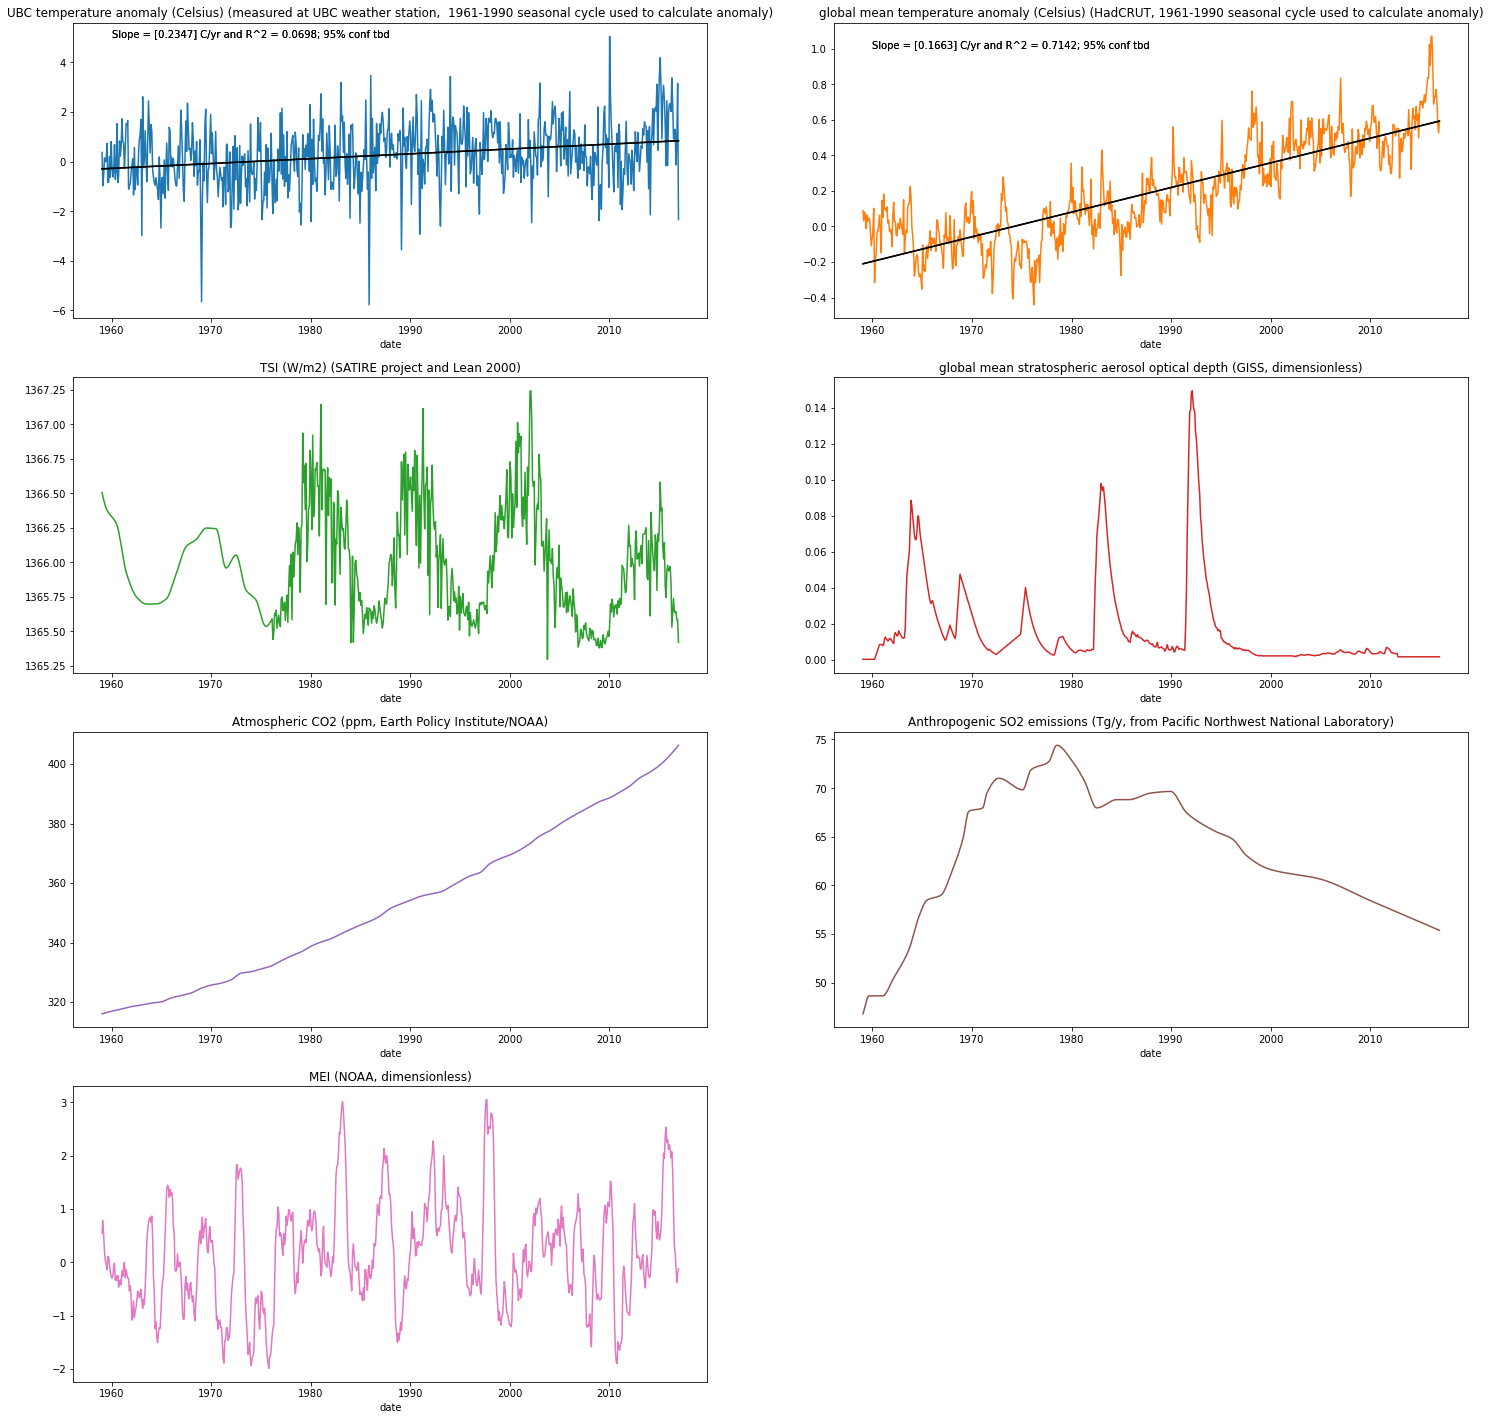

In [7]:
# Just to keep our code short, lets save the ubc temperature anamolies in its own array
ubc_temp = lab3_data[r'UBC temperature anomaly (Celsius) (measured at UBC weather station,  1961-1990 seasonal cycle used to calculate anomaly)']                                      

#creating the model
model1 = LinearRegression()

#reshaping the data, try and see what happens if you dont do this
dates_reshape = lab3_data.index.values
dates_reshape = dates_reshape.reshape(-1,1)

 #Performing the linear regression
model1.fit(dates_reshape,ubc_temp)

#Calculating the trendline
ubc_prediction = model1.predict(dates_reshape) 

#our slope C/yr (hence the *12)
ax11_slope = model1.coef_*12 

# R^2 value
ax11_score = model1.score(dates_reshape,ubc_temp) 
'''ax11_conf = out of my knowledge what confidence rates are and how to do it python, will go over it later'''
ax11.plot(lab3_data.index.values,ubc_prediction,'k')
ax11.text(1960,5,'Slope = '+ str(np.round(ax11_slope,4)) +" C/yr and R^2 = "+str(np.round(ax11_score,4))+"; 95% conf tbd")

global_temp = lab3_data[r'global mean temperature anomaly (Celsius) (HadCRUT, 1961-1990 seasonal cycle used to calculate anomaly)']

model2 = LinearRegression()
dates_reshape = lab3_data.index.values
dates_reshape = dates_reshape.reshape(-1,1)
model2.fit(dates_reshape,global_temp) #Performing the linear regression
global_prediction = model2.predict(dates_reshape) #Calculating the trendline
ax12_slope = model2.coef_*12 # C/yr
ax12_score = model2.score(dates_reshape,global_temp) # R^2 value
'''ax12_conf = out of my knowledge what confidence rates are and how to do it python, will go over it later'''
ax12.plot(lab3_data.index.values,global_prediction,'k')
ax12.text(1960,1,'Slope = '+ str(np.round(ax12_slope,4)) +" C/yr and R^2 = "+str(np.round(ax12_score,4))+"; 95% conf tbd")

plt.show()
fig1



Are you surprised by the sign of the trend found? Looking at 95% confidence intervals on these slopes, are you confident that the trend observed are significant? Which temperature time series has the highest trend? The highest coefficient of determination? Does this surprise you?

Last, we will use histograms to visualize temporal trends in temperature time series. If there is a monotonous trend in our data, the distribution of temperature anomalies before, say, 1985 and after 1985 should be shifted. For each temperature time series, plot these two histograms on the same plot. You can make a single figure with two subplots (one for UBC data and one for the global data). To plot the two histograms in each subplot, use command lines of the form:


histogram(T(mask1),linspace(min(T),max(T),n),'Normalization','probability')
hold on 
histogram(T(mask2),linspace(min(T),max(T),n),'Normalization','probability')

where T is your temperature time series, and mask1/mask2 are masks to select data before or after 1985. linspace(min(T),max(T),n) set the edges of the bins of your histograms to be regularly spaced between the min and the max temperature with n bins. Play with the value of n and decides what value enables to best visualize the data. The normalization option ‘probability’ enable to display the percentage of data in each bin instead of the number of data points in each bin.

Do these histogram plots confirm the results of your linear regression?


2.	Variations in trends

Increasing CO2 concentration tends to cause an increase of global mean temperature because of the greenhouse effect. However, many other factors impact variations of global mean temperature. In particular, at decadal timescales, events such as El Niño or volcanic eruptions can cause fluctuations in temperature that will counteract or enhance the effect of rising CO2. To quantify these fluctuations, calculate (again) trends in the temperature anomalies time series, but for each decade over the 1950-2016 period. For example, for the 1950’s and for the global mean temperature anomaly time series, perform a linear regression of the 1950-1959 temperatures against time and find the slope, i.e., the temperature trend. Do this for all other decades and for the UBC temperature time series.

Hints: use masks to isolate temperatures and dates belonging to a given decade; you can use a for-loop to go through each decade. Check out the prelab if you don’t remember how to use the regress() function and how to get slope estimate and 95% confidence intervals.


Report your results, as well as the trends over the entire period, in the first table of the Lab3 worksheet. Additionally, highlight the decades for which the trend is positive within the 95% confidence interval (by circling them or underlining them) and do the same for the trend over the entire period. For example, if you estimate a value of 0.1 (you will have to report units in the worksheet) with a 95% confidence interval of [0.02 0.2], then the trend is positive within the 95% confidence interval. This would not be the case for an interval of [-0.02 0.2].

In general, are the local (UBC) or global trend the largest? The most significant? Did you find many decades for which the temperature trend is not positive within the 95% interval? What is the largest/smallest trend you found for each time series? Are you surprised by these numbers? Based on the trends you found and on your graph, would you say that there is an ongoing global warming trend since 1950? Is there any warming trend at UBC?


3.	Local vs Global temperature

In the previous section, you may have found differences between trends in the temperature measured at UBC and global mean temperature. To further characterize these differences, plot the UBC temperature anomaly vs the global mean temperature anomaly (use markers symbol to plot, no continuous line). On your plot, annotate the correlation coefficient of the two time series as well as the associated p-value (you can use the function text() to do that.
Is there a significant correlation between both variables? Do you find the value of the correlation coefficient very large? Can you explain why the two time series are not perfectly correlated?

4.	Impact of specific forcing on global temperature anomaly


For each of the 5 variables TSI, AOD, CO2, SO2 and MEI:
-perform a linear regression of the global mean temperature anomaly against the considered variable
-report the slope of the linear regression (with units!), the 95% confidence interval on the slope, and the coefficient of determination in table 2 of the worksheet

Does the sign of each slope match your expectations? Which variables seem to explain most of the temperature variability? Which variable has a large confidence on the sign of the linear regression slope?

In addition, make a figure where you plot the global mean temperature anomaly vs MEI and UBC temperature anomaly vs MEI on two different subplots. Perform a simple linear regression for each pair of variables, plot the linear regression line and annotate the slope on each subplot. Do these scatter plots and the sign of the slopes match what you expected? Does the El Niño oscillation have a similar impact on global temperature and UBC temperature?

5.	Combined impacts of multiple forcing on global temperature anomaly

You may have noticed that none of the 5 explanatory variables (TSI, AOD, CO2, SO2 and MEI) used in this lab explain most temperature variations. However, their combined effects may be able to explain the majority of temperature variability. To assess this, perform a multilinear regression (cf prelab) where the dependent variable is the global mean temperature anomaly and the independent variables are the TSI, AOD, CO2, SO2 and MEI.

Report the coefficients and confidence interval associated to each independent variable in the prelab worksheet.

Additionally, plot the observed temperature against the temperature predicted by your multilinear regression. Add the line of equation y=x on your plot (all datapoints should be on this line if the regression was perfectly explaining variability in observed temperature) and annotate the coefficient of determination of the multilinear regression on your plot.


6.	What can we conclude?

Before answering the wrap-up questions of the lab 3 worksheet, this section aims at highlighting some of the limitations of the methods used in this lab.

Load the data contained in ‘dummyvariables_lab3.xlsx’ available on connect. 

First, plot the global mean temperature anomaly as a function of the age of Donald Trump. Calculate the correlation coefficient and pvalue of these two time series. Is there a strong correlation? What is the level of significance of the correlation (make them appear on your graph)? Is the increase in global mean temperature caused by Donald Trump growing older? Does this plot change your way of thinking about previous results from this lab?

Secondly, open a new figure that will be divided in two subplots.
	In the first one:
o	Plot the truncated CO2 time series against the truncated temperature anomaly using marker symbols of your choice. Note that these data are NOT real and were made up from your TA imagination...
o	Perform a linear regression of temperature vs CO2.
o	Annotate the slope, coefficient of determination and p-value on your graph
o	Plot the line corresponding to your regression using a continuous line. Do you think that your linear regression represent accurately the data?
	Then, on the second subplot:
o	Pot the temperature predicted by your linear regression for the complete CO2 data (column five of ‘dummyvariables_lab3.xlsx’) using a continuous line.
o	On the same plot, plot the complete temperature anomaly against the complete CO2 data using marker symbols of your choice. About half of the data points are the EXACT SAME as the truncated data you plotted on the first subplot, but the complete data spans a larger change of CO2 values. Legend your graph. Again, note that these data are NOT real.


Does your linear model predict accurately the dependence of temperature on CO2? Why? How does it make you rethink our previous results? Can you think of a way to test the accuracy of the linear regression models used in previous part of the labs? What would be the limitation of such tests?